# scikit-learn의 Breast Cancer 데이터셋을 사용해서, PyTorch로 이진 분류 BaseLine

이번에는 scikit-learn의 Breast Cancer 데이터셋을 사용하여 PyTorch로 간단한 이진 분류(BaseLine) 모델을 구축하는 과정을 다루어 볼 것입니다.

해당 자료에서는 데이터 로드부터 모델 평가 및 시각화까지의 전 과정을 포함하며, 모델 성능을 개선하기 위한 과제까지 함께 제공되오니 참고해주세요.

## 0. 필요한 라이브러리 import

먼저, 모델 구축과 데이터 처리를 위해 필요한 라이브러리를 불러옵니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 로드 및 전처리

- scikit-learn의 load_breast_cancer() 함수를 사용하여 유방암 진단 데이터를 로드하고, Pandas DataFrame으로 변환합니다.

In [ ]:
# 데이터 로드
cancer = load_breast_cancer()

# DataFrame 변환
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 데이터 구조

- 행 (Row): 각 행은 한 명의 환자를 나타냅니다.
- 열 (Column): 각 열은 환자의 특징(feature) 또는 진단 결과(target)를 나타냅니다.

### 특징 (Features)

데이터셋에는 종양의 다양한 특징을 나타내는 30개의 열이 있습니다.

- mean radius: 종양의 평균 반지름
- mean texture: 종양의 평균 질감
- mean perimeter: 종양의 평균 둘레
- mean area: 종양의 평균 면적
- mean smoothness: 종양 표면의 평균 매끄러움
- mean compactness: 종양의 평균 조밀도
... (나머지 24개 특징)

### 진단 결과 (Target)
- 0: 악성 종양 (Malignant) - 유방암
- 1: 양성 종양 (Benign) - 유방암이 아님


### 데이터 분리

In [ ]:
X = cancer.data
y = cancer.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


- 특징과 타겟 데이터를 분리하고, 그 형태를 확인합니다.

## 2. 데이터 분할

- 데이터를 훈련 세트와 테스트 세트로 분할하여 모델 학습과 평가를 진행합니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(455, 30) (114, 30)
(455,) (114,)


- train_test_split

    - test_size=0.2
        전체 데이터의 20%를 테스트 세트로 사용.

    - random_state=42
        동일한 결과를 재현하기 위해 랜덤 시드를 고정.


## 3. PyTorch 텐서로 변환

PyTorch 모델에서 데이터를 사용하기 위해 NumPy 배열을 텐서로 변환합니다.



In [ ]:
# 훈련 데이터 텐서 변환
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).reshape(-1, 1)

# 테스트 데이터 텐서 변환
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

torch.Size([455, 30])
torch.Size([455, 1])
torch.Size([114, 30])
torch.Size([114, 1])


PyTorch는 텐서라는 데이터 구조를 사용하여 연산을 수행합니다.

따라서 머신러닝 모델을 PyTorch로 만들려면 데이터를 텐서로 변환해야 합니다.

- torch.FloatTensor

    NumPy 배열이나 Python 리스트를 PyTorch의 FloatTensor (실수형 텐서)로 변환하는 함수입니다.

- reshape(-1, 1)

    타겟 데이터 (y_train, y_test)의 모양을 변경하는 함수입니다. -1은 자동으로 계산되도록 하고, 1은 열의 개수를 1로 지정합니다. 이렇게 하면 타겟 데이터를 (N, 1) 형태로 변환하여 모델과의 호환성 확보할 수 있습니다.

간단히 말해서, PyTorch에서 사용할 수 있도록 데이터를 텐서 형태로 바꿉니다.

## 4. 모델 생성 및 학습 준비

간단한 신경망 모델을 정의하고, 손실 함수와 옵티마이저를 설정합니다.

In [ ]:
class CancerClassifier(nn.Module):
    def __init__(self):
        super(CancerClassifier, self).__init__()
        self.linear = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

# 모델 인스턴스 생성
model = CancerClassifier()

# 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

- CancerClassifier (nn.Module):

    - self.linear: 입력 30개 특징을 받아 출력 1개의 값을 생성하는 선형 레이어.

    - self.sigmoid: 출력 값을 0과 1 사이로 변환하여 확률로 해석.

- criterion (nn.BCELoss): 이진 분류 문제에 적합한 Binary Cross Entropy 손실 함수.

- optimizer (optim.SGD): 확률적 경사 하강법(Stochastic Gradient Descent) 옵티마이저로, 학습률(lr)을 0.0001로 설정.

그러면, 이제 모델을 만들고 학습시킬 준비가 완료되었습니다!

다음 단계에서는 실제로 데이터를 사용하여 모델을 학습시키는 과정을 진행하도록 하겠습니다!

## 5. 모델 학습

모델을 학습시키기 위해 지정된 에포크 동안 데이터에 대해 순전파와 역전파를 수행합니다.

In [ ]:
epochs = 10
losses = []

for epoch in range(epochs):
    model.train()

    # 순전파
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 50.3865
Epoch [2/10], Loss: 50.3861
Epoch [3/10], Loss: 50.3858
Epoch [4/10], Loss: 50.3854
Epoch [5/10], Loss: 50.3850
Epoch [6/10], Loss: 50.3846
Epoch [7/10], Loss: 50.3843
Epoch [8/10], Loss: 50.3839
Epoch [9/10], Loss: 50.3835
Epoch [10/10], Loss: 50.3831


### 학습 과정 설명

1. 에포크 설정

    - 전체 데이터셋을 몇 번 반복할지 설정 (epochs = 10).

2. 순전파 (Forward Pass)

    - 모델을 통해 예측값(y_pred)을 계산하고, 손실(loss)을 구함.

3. 역전파 (Backward Pass)

    - optimizer.zero_grad()
        - 이전 단계의 기울기 초기화.

    - loss.backward()
        - 손실을 기반으로 기울기 계산.

    - optimizer.step()
        - 옵티마이저를 사용해 모델 파라미터 업데이트.

4. 손실 기록 및 출력
    - 각 에포크의 손실 값을 기록하고 출력.

주의: 현재 설정된 에포크 수(epochs = 10)와 학습률(lr=0.0001)은 모델 성능이 좋지 않은 이유 중 하나입니다. 이는 의도적으로 설정된 것으로, 모델 성능 개선을 위한 과제를 제공하오니 참고해주세요.

## 6. 손실 그래프 그리기

학습 과정 동안 기록된 손실 값을 시각화하여 학습의 진행 상황을 확인합니다.

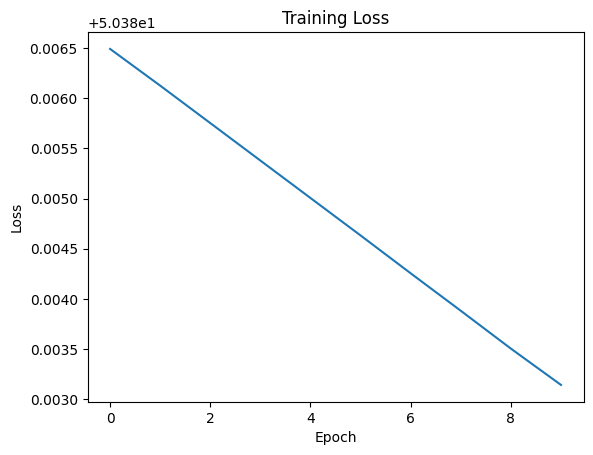

In [ ]:
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## 7. 모델 평가

학습된 모델의 성능을 테스트 데이터셋을 사용하여 평가합니다.

In [ ]:
from sklearn.metrics import recall_score, f1_score

model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_test).float().mean()
    print(f'Test Accuracy: {accuracy.item():.4f}')

    recall = recall_score(y_test, y_pred_class)
    print(f'Recall: {recall:.4f}')

    f1 = f1_score(y_test, y_pred_class)
    print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.3772
Recall: 0.0000
F1 Score: 0.0000


- model.eval(): 평가 모드로 전환 (드롭아웃 등 비활성화).

- torch.no_grad(): 평가 시 기울기 계산 비활성화로 메모리 절약.

- y_pred_class: 예측 확률을 기준으로 클래스 결정 (0.5 이상이면 1, 아니면 0).

- Accuracy: 예측이 실제 값과 일치하는 비율 계산.

## 8. 시각화

- 모델의 성능을 보다 직관적으로 이해하기 위해 혼동 행렬과 ROC 커브를 시각화합니다.

### 혼동 행렬 (Confusion Matrix)

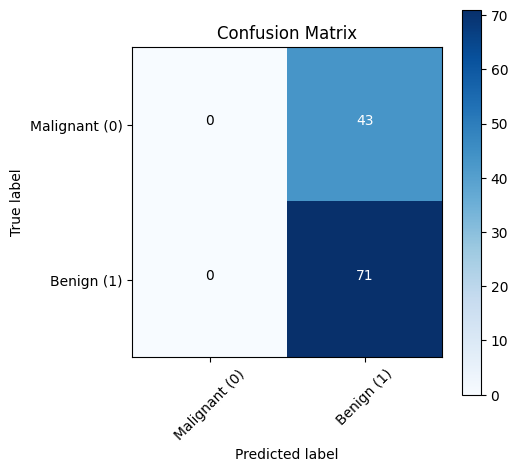

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 혼동 행렬 계산
cm = confusion_matrix(y_test.numpy(), y_pred_class.numpy())

# 혼동 행렬 시각화
plt.figure(figsize=(5, 5))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Malignant (0)', 'Benign (1)'], rotation=45)
plt.yticks(tick_marks, ['Malignant (0)', 'Benign (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

# 각 셀에 숫자 표시
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

### 혼동 행렬 설명

<img src='https://i.namu.wiki/i/eSMR6d76wWErA7K-y3YfnjJVQwxL6KRi09OLDdDs41s8V7EduWXD79wTg4EFkaK1n8J4UfpUcwxW6CyzMtbpTg.webp'>

- True Positive (TP): 실제 양성을 양성으로 예측
- False Negative (FN): 실제 양성을 음성으로 예측
- False Positive (FP): 실제 음성을 양성으로 예측
- True Negative (TN): 실제 음성을 음성으로 예측

### ROC 커브 (Receiver Operating Characteristic Curve)

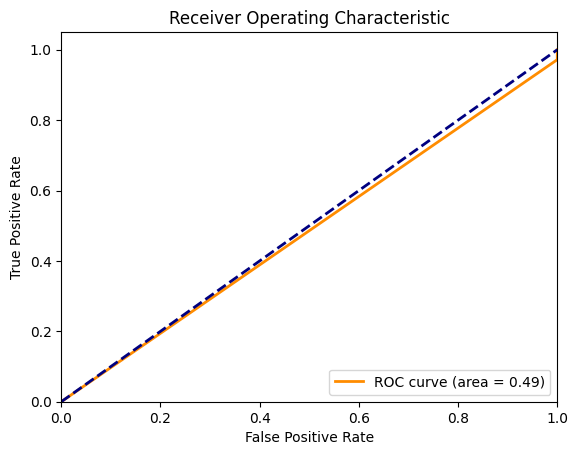

In [ ]:
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test.numpy(), y_pred.numpy())
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- ROC 커브: 다양한 임계값에서의 TPR(재현율)과 FPR을 시각화.

- AUC (Area Under Curve): ROC 커브 아래의 면적으로, 모델의 전반적인 성능을 평가하는 지표. 1에 가까울수록 우수.


## 9. 과제: 모델 성능 개선하기

현재 모델의 성능이 의도적으로 좋지 않은 상태입니다. 다음 과제를 통해 모델의 성능을 개선해 보세요.

### 과제 내용

1. 학습률 (Learning Rate) 조정

    - 현재 학습률 lr=0.0001은 매우 낮아 학습 속도가 느릴 수 있습니다.
    - 다양한 학습률 값을 시도하여 최적의 학습률을 찾아보세요.

2. 에포크 수 증가

    - 현재 에포크 수는 10으로 매우 적습니다.
    - 에포크 수를 증가시켜 모델이 충분히 학습할 수 있도록 해보세요.

3. 모델 구조 변경

    - 단일 선형 레이어 대신 다층 신경망(Multi-layer Neural Network)을 구성하여 모델의 표현력을 높여보세요.

    ```
    class ImprovedCancerClassifier(nn.Module):
    def __init__(self):
        super(ImprovedCancerClassifier, self).__init__()
        self.layer1 = nn.Linear(30, 16)
        self.layer2 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x
        ```

4. 손실 함수 및 옵티마이저 변경

    - nn.BCELoss 대신 nn.BCEWithLogitsLoss를 사용하여 수치적 안정성을 높여보세요.

    - 옵티마이저를 Adam으로 변경하여 학습 속도와 성능을 개선해보세요.

    ```
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    ```

5. 데이터 정규화 (Normalization):

    - 특징 데이터의 스케일을 조정하여 모델 학습을 용이하게 만드세요.

    ```
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 텐서 변환
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)

    ```

6. 정규화 기법 적용

- 과적합을 방지하기 위해 드롭아웃(Dropout)이나 배치 정규화(Batch Normalization)를 적용해보세요.


### 제출 방식 (위에 제안한 모든 것을 해보시라는 것은 아닙니다.)

1. 여러분들의 방식으로 개선된 모델의 코드와 성능(정확도, ROC AUC 등)을 제출해주세요.

2. 각 개선 방법이 모델 성능에 어떤 영향을 미쳤는지 분석해보세요.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
cancer = load_breast_cancer()

# DataFrame 변환
X = cancer.data
y = cancer.target

In [ ]:
X.shape

(569, 30)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scipy.stats as stats

# # 각 특성에 대해 정규성 검정
# for i in range(X.shape[1]):
#     feature = X[:, i]

#     # 히스토그램 및 KDE 플롯
#     plt.figure(figsize=(12, 6))
#     sns.histplot(feature, bins=30, kde=True)
#     plt.title(f'Histogram and KDE of Feature {i + 1}')
#     plt.xlabel('Value')
#     plt.ylabel('Frequency')
#     plt.show()

#     # Q-Q 플롯
#     plt.figure(figsize=(12, 6))
#     stats.probplot(feature, dist="norm", plot=plt)
#     plt.title(f'Q-Q Plot of Feature {i + 1}')
#     plt.show()

#     # Shapiro-Wilk 검정
#     stat, p = stats.shapiro(feature)
#     print(f'Feature {i + 1} - Statistics={stat:.3f}, p-value={p:.3f}')

#     # p-value 해석
#     if p > 0.05:
#         print('데이터는 정규 분포를 따른다 (귀무가설 채택)\n')
#     else:
#         print('데이터는 정규 분포를 따르지 않는다 (귀무가설 기각)\n')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 데이터들이 정규 분포를 따르지 않으므로 표준화가 아닌 정규화 진행
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 텐서 변환
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# 훈련 데이터 텐서 변환
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).reshape(-1, 1)

# 테스트 데이터 텐서 변환
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(569, 30)
<class 'numpy.ndarray'>
(569,)
<class 'numpy.ndarray'>
torch.Size([455, 30]) torch.Size([114, 30])
(455,) (114,)
torch.Size([455, 30])
torch.Size([455, 1])
torch.Size([114, 30])
torch.Size([114, 1])


In [ ]:
class CancerClassifier(nn.Module):
    def __init__(self):
        super(CancerClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(30, 16),
            nn.BatchNorm1d(16),  # Batch Normalization 추가
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),   # Batch Normalization 추가
            nn.ReLU(),
            nn.Linear(8, 1)
        )
    def forward(self, x):
        return self.model(x)

# 모델 인스턴스 생성
model = CancerClassifier()

# 손실 함수와 옵티마이저 설정
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                 factor=0.1, patience=10, verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
import torch.optim as optim

epochs = 200
losses = []
pre_lr = optimizer.param_groups[0]['lr']
for epoch in range(epochs):

    model.train()

    # 순전파
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    scheduler.step(loss.item())

    if optimizer.param_groups[0]['lr'] != pre_lr :
        print(f"Learning Rate {pre_lr} -> {optimizer.param_groups[0]['lr']}")
    pre_lr = optimizer.param_groups[0]['lr']

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [10/200], Loss: 0.4151
Epoch [20/200], Loss: 0.2735
Epoch [30/200], Loss: 0.1706
Epoch [40/200], Loss: 0.1106
Epoch [50/200], Loss: 0.0769
Epoch [60/200], Loss: 0.0575
Epoch [70/200], Loss: 0.0444
Epoch [80/200], Loss: 0.0346
Epoch [90/200], Loss: 0.0277
Epoch [100/200], Loss: 0.0224
Epoch [110/200], Loss: 0.0179
Epoch [120/200], Loss: 0.0144
Epoch [130/200], Loss: 0.0115
Epoch [140/200], Loss: 0.0093
Epoch [150/200], Loss: 0.0075
Epoch [160/200], Loss: 0.0062
Epoch [170/200], Loss: 0.0051
Epoch [180/200], Loss: 0.0043
Epoch [190/200], Loss: 0.0037
Epoch [200/200], Loss: 0.0032


In [ ]:
from sklearn.metrics import recall_score, f1_score

model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_test).float().mean()
    print(f'Test Accuracy: {accuracy.item():.4f}')

    recall = recall_score(y_test, y_pred_class)
    print(f'Recall: {recall:.4f}')

    f1 = f1_score(y_test, y_pred_class)
    print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.9561
Recall: 0.9577
F1 Score: 0.9645


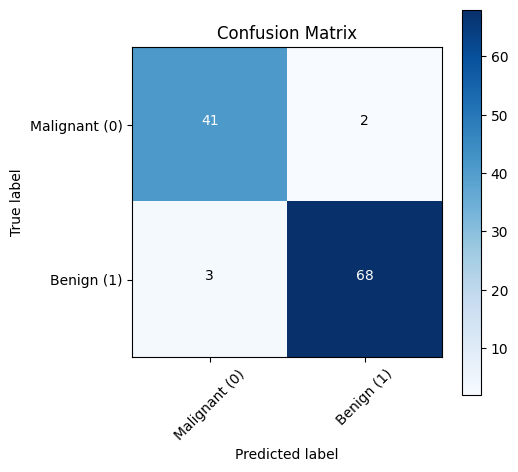

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 혼동 행렬 계산
cm = confusion_matrix(y_test.numpy(), y_pred_class.numpy())

# 혼동 행렬 시각화
plt.figure(figsize=(5, 5))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Malignant (0)', 'Benign (1)'], rotation=45)
plt.yticks(tick_marks, ['Malignant (0)', 'Benign (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

# 각 셀에 숫자 표시
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

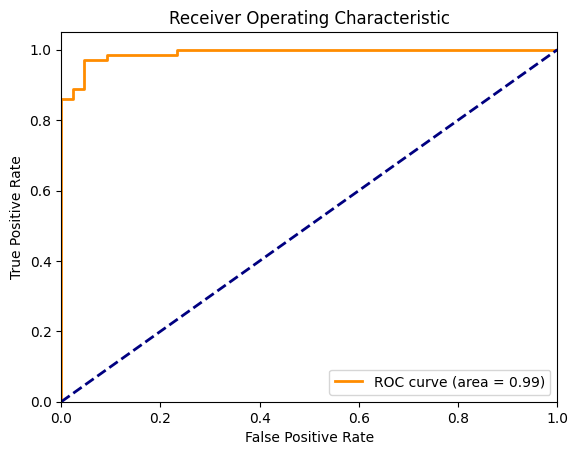

In [ ]:
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test.numpy(), y_pred.numpy())
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 결론

이번에는 scikit-learn의 Breast Cancer 데이터셋을 사용하여 PyTorch로 간단한 이진 분류 모델을 구축하고 평가하는 과정을 살펴보았습니다.

모델의 기본적인 구조와 학습 과정을 이해한 후, 성능 개선을 위한 다양한 방법을 과제로 제시하였습니다.

이러한 과정을 통해 딥러닝 모델의 기본 개념과 실습을 익힐 수 있습니다.

